# Builing a time series model
* Joakim Blix Prestmo
* 09.05.2018
## Models
* Starting with error correction model
* Continue with a GMM apporach
* Finishing with a Threashold model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.sandbox.regression import gmm

from statsmodels.tsa.vector_ar.var_model import VAR

#from arch.unitroot import DFGLS

C:\Users\i235jbp\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
df = pd.read_csv('..\samlet_datasett_08_07_2018.csv')


In [8]:
dates = pd.date_range('19840101', periods=132, freq='Q')

#dates = pd.date_range('20130101', periods=4, freq='MS')
df.index=dates


In [9]:
df.index = pd.DatetimeIndex(df.index)
df.drop('Unnamed: 0', 1, inplace=True)

In [10]:
ols_data_est=df[:-4]
ols_data_est.tail()

,K1015,K4015,K5015,K1025,K4025,K5025,K1030,K4030,K5030,K1045,...,DRRT,DRRT_1,DRRT_2,DRRT_3,DRRT_4,DUC,DUC_1,DUC_2,DUC_3,DUC_4
2014-12-31,45008.63335,1228.63344,26863.91132,59655.72159,1861.50703,31505.95344,57451.07448,403.80079,33492.49197,32638.62799,...,0.001007,-0.002964,0.002853,0.001899,0.006606,-0.551075,0.210360,1.500469,-2.615974,-1.524003
2015-03-31,44710.30725,1191.80247,26561.60836,59232.71540,1818.56478,30824.29604,57026.93180,393.97402,33001.70482,32477.86500,...,-0.000094,0.001007,-0.002964,0.002853,0.001899,-0.863427,-0.551075,0.210360,1.500469,-2.615974
2015-06-30,44660.74877,1164.56761,26428.23710,59028.06353,1802.96125,30519.94567,56712.87368,397.61474,32731.88960,32285.78419,...,-0.002950,-0.000094,0.001007,-0.002964,0.002853,-0.060014,-0.863427,-0.551075,0.210360,1.500469
2015-09-30,44585.25589,1133.09735,26149.56614,58657.08984,1754.94256,29993.58201,56477.97224,415.79142,32508.87342,32054.57948,...,0.002414,-0.002950,-0.000094,0.001007,-0.002964,-0.979236,-0.060014,-0.863427,-0.551075,0.210360
2015-12-31,44556.66137,1136.89896,26177.23213,58369.50351,1716.33108,29789.86767,56254.37121,418.17763,32914.92901,31864.73983,...,-0.005567,0.002414,-0.002950,-0.000094,0.001007,0.102864,-0.979236,-0.060014,-0.863427,-0.551075


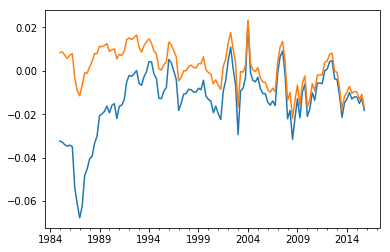

In [12]:
df['RRT'].plot()
(df['REN100']-df['KPI'].diff(4)).plot()
plt.show()

In [23]:
df_dkv=pd.get_dummies(df.index.quarter, prefix="DKV")
df_dkv.index=dates

In [27]:
df = pd.concat([df, df_dkv], axis=1)
df.head()

,K1015,K4015,K5015,K1025,K4025,K5025,K1030,K4030,K5030,K1045,...,DRRT_4,DUC,DUC_1,DUC_2,DUC_3,DUC_4,DKV_1,DKV_2,DKV_3,DKV_4
1984-03-31,40587.46941,2037.32411,14324.01745,53830.59095,2163.89247,25533.96959,50855.79793,139.07458,40625.98823,54639.35207,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
1984-06-30,40711.26442,2025.30404,14259.90152,53880.47646,2129.62892,25436.76146,50786.99933,143.95469,40412.69433,54548.34942,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
1984-09-30,40867.62893,2004.60328,14185.49137,54117.32448,2095.85917,25430.38127,50796.56177,147.85627,40368.99768,54534.04365,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
1984-12-31,41393.02563,1976.91600,14322.99561,54425.35767,2087.38581,25472.50092,50852.66113,148.60672,40608.06934,54688.84131,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
1985-03-31,41222.82523,1937.98372,14146.12024,54287.48845,2062.41218,25203.69988,50734.42618,141.79378,40356.67348,55251.25983,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0


# Error correction

In [30]:
formel = 'Dlog_JK3 ~ 1 + Dlog_JK3_3 +Dlog_X3_3 + Dlog_YE_Y3_1+ log_JK3_1 + log_X3_1 + log_YE_Y3_3 + S_1 + DKV_1 + DKV_2 + DKV_3'

ECmodel = smf.ols(formel, data = df)
result = ECmodel.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Dlog_JK3   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     78.60
Date:                Sun, 08 Jul 2018   Prob (F-statistic):           3.86e-46
Time:                        20:50:50   Log-Likelihood:                 126.45
No. Observations:                 124   AIC:                            -230.9
Df Residuals:                     113   BIC:                            -199.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6692      0.576      2.898   

# GMM 

In [31]:
df['log_JK3_lead']=df['log_JK3'].shift(-1)
df['RRT_lead']=df['RRT'].shift(-1)
df['const']=1

In [32]:
endog_df=df[['RRT_lead', 'log_JK3_lead', 'log_JK3']]
exog_df = endog_df #df[['RRT','S',  'log_YE_Y3', 'log_X3' ]]

In [33]:
instrument_df = df[['RRT_1', 'RRT_2', 'log_JK3_1', 'Dlog_JK3_1', 'Dlog_JK3_2',
                           'const']]

In [34]:
endog, exog, instrument  = map(np.asarray, [endog_df, exog_df, instrument_df])

In [35]:
def moment_invest(params, exog):
    beta, gamma = params
    #endog, exog = args
    RRT_lead, log_JK3_lead, log_JK3 = exog.T  # unwrap iterable (ndarray)
    
    # 2nd part of moment condition without instrument    
    predicted = beta * (1. + RRT_lead) * np.power(log_JK3_lead / log_JK3, gamma)
    return predicted




In [36]:
endog2 = np.ones(exog.shape[0])    
mod = gmm.NonlinearIVGMM(endog2, exog, instrument, moment_invest)
#w0inv = np.dot(instrument.T, instrument) / len(endog2)  
#res2_hac4_2s = mod2.fit([1,-1], maxiter=2, inv_weights=w0inv, weights_method='hac', wargs={'maxlag':4})

C:\Users\i235jbp\Anaconda3\lib\site-packages\statsmodels\base\data.py:131: RuntimeWarning: invalid value encountered in reduce
  const_idx = np.where(self.exog.ptp(axis=0) == 0)[0].squeeze()
C:\Users\i235jbp\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\i235jbp\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1647: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


# Maximum likelihood

# Threshold model 

In [37]:
# building threshold variables
medianDx3 = df['Dlog_X3_4'].median()
highDx3 = df['Dlog_X3_4'] >= medianDx3
highmedianDx3 = medianDx3*(-10)
higherDx3 = df['Dlog_X3_4'] >= highmedianDx3
HDUMX3 = higherDx3
# **************************
medianDYE_Y = df['Dlog_YE_Y3_4'].median()
highDYE_Y3 = df['Dlog_YE_Y3_4'] >= medianDYE_Y
highmedianDYE_Y = medianDYE_Y*(-10)
higherDYE_Y = df['Dlog_YE_Y3_4'] >= highmedianDYE_Y
HDUMYE_Y= higherDYE_Y



In [39]:
TARmodel = smf.ols('Dlog_JK3 ~ 1 + Dlog_JK3_1 + log_JK3_1 + (HDUMYE_Y)*Dlog_YE_Y3_1 + HDUMX3*log_X3_1 + (HDUMYE_Y)*log_YE_Y3_1', 
                   data = df)
result = TARmodel.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Dlog_JK3   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     30.00
Date:                Sun, 08 Jul 2018   Prob (F-statistic):           1.36e-27
Time:                        20:52:25   Log-Likelihood:                 79.246
No. Observations:                 126   AIC:                            -136.5
Df Residuals:                     115   BIC:                            -105.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     